<a href="https://colab.research.google.com/github/pikey-msc/Python/blob/main/M3/C8_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trading algoritmico

¿Qué son las acciones y divisas? ¿Qué es el trading  con  acciones?

**Acciones**

Una acción es una representación de una participación en la propiedad de una corporación, que se emite a un determinado precio. Es un tipo de garantía financiera que establece su reclamo sobre los activos y el rendimiento de una empresa.

Una organización o empresa emite acciones para recaudar más fondos/capital a fin de ampliar la escala y participar en más proyectos. Estas acciones se ponen a disposición del público y se venden y compran.

**Divisas**

Es la equivalencia monetaria entre dos monedas, está influenciada por términos macroeconómicos y políticos.


**Estrategia de trading y compra de acciones y/o divisas**

El proceso de compra y venta de acciones y/o divisas existentes y previamente emitidas se denomina invertir en acciones y/o divisas. Existe un precio al que se puede comprar y vender una acción y/o divisa, y éste sigue fluctuando dependiendo de la demanda y la oferta en el mercado de valores.


Los inversores  pagan dinero a cambio de la propiedad dentro de una empresa, con la esperanza de hacer algunas transacciones rentables y vender las acciones a un precio más alto.

Otra técnica importante que siguen los inversores es el short selling  o venta en corto. Esto implica que las acciones y/o divisas que toman prestadas se venden inmediatamente con la esperanza de comprarlas más tarde a un precio más bajo, devolverlas al prestamista y obtener el margen.

La mayoría de los inversores siguen un plan y un modelo para invertir. Esto se conoce como una estrategia de inversión.

Los traders cuantitativos de los fondos de cobertura y los bancos de inversión diseñan y desarrollan estas estrategias y marcos operativos para ponerlos a prueba. Se requieren profundos conocimientos de programación y una comprensión de los lenguajes necesarios para elaborar su propia estrategia.

## Extracción

In [1]:
import pandas as pd
!pip install -U yfinance
import yfinance as yf

     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 6.4 MB 21.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [8]:
tickers_list = ['BTC-USD']

msft_data = yf.download(tickers_list, '2015-01-01', '2022-03-15')
msft_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-11,39439.968750,40081.679688,38347.433594,38794.972656,38794.972656,26364890465
2022-03-12,38794.464844,39308.597656,38772.535156,38904.011719,38904.011719,14616450657
2022-03-13,38884.726562,39209.351562,37728.144531,37849.664062,37849.664062,17300745310
2022-03-14,37846.316406,39742.500000,37680.734375,39666.753906,39666.753906,24322159070
2022-03-15,39716.980469,39794.628906,38310.210938,39497.265625,39497.265625,24962306048


Aquí tenemos los datos de precios de las acciones de Microsoft EOD de los últimos 9 años.

## Análisis  de datos

In [5]:
msft_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2631 entries, 2015-01-01 to 2022-03-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2631 non-null   float64
 1   High       2631 non-null   float64
 2   Low        2631 non-null   float64
 3   Close      2631 non-null   float64
 4   Adj Close  2631 non-null   float64
 5   Volume     2631 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 143.9 KB


Un índice puede ser pensado como una estructura de datos que nos ayuda a modificar o referenciar los datos. Los datos de series temporales son una secuencia de instantáneas de precios tomadas en intervalos de tiempo consecutivos e igualmente espaciados.

En el trading, los datos de precios de las acciones EOD capturan el movimiento de ciertos parámetros sobre una acción, como el precio de la acción, durante un período de tiempo especificado con puntos de datos registrados a intervalos regulares.

**Terminología importante**

Mirando otras columnas, tratemos de entender lo que representa cada columna:

* Open/Close - Captura el precio de apertura/cierre de la acción
* Adj_Open/Adj_Close - Es el precio de apertura/cierre ajustado es el precio de una acción en un día determinado de negociación que ha sido revisado para incluir cualquier distribución de dividendos, divisiones de acciones y otras acciones corporativas que se produjeron en cualquier momento antes de la apertura del día siguiente.
* Volume - registra el número de acciones que se negocian en un día determinado de negociación.
* High/Low -  registra el precio más alto y el más bajo de las acciones durante un día de negociación determinado.

Estas son las columnas importantes en las que nos centraremos en este momento.

Podemos conocer las estadísticas resumidas de los datos, que nos muestran el número de filas, la media, el máximo, las desviaciones estándar, etc.

In [9]:
msft_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000,2.631000e+03
mean,12009.906595,12332.285602,11653.805396,12022.991260,12022.991260,1.539498e+10
std,16416.974344,16856.629868,15909.948671,16419.934751,16419.934751,2.013788e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,686.842499,704.103027,671.489502,688.506500,688.506500,1.052825e+08
50%,6545.529785,6643.100098,6449.000000,6544.430176,6544.430176,5.764190e+09
75%,10922.129883,11196.663574,10619.619629,10923.727051,10923.727051,2.577623e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


### resample

El método de resample de Pandas se utiliza para facilitar el control y la flexibilidad en la conversión de frecuencia de los datos de las series temporales. Podemos especificar los intervalos de tiempo para remuestrear los datos a mensual, trimestral o anual, y realizar la operación requerida sobre ellos.

In [10]:
print(msft_data.resample('M').mean())

                    Open          High           Low         Close  \
Date                                                                 
2015-01-31    251.799905    261.391583    240.495550    248.782547   
2015-02-28    232.821856    240.211430    227.769678    234.153645   
2015-03-31    269.278419    274.850999    263.134162    269.042259   
2015-04-30    235.708668    238.957098    231.734033    235.491534   
2015-05-31    237.161806    239.563161    234.939388    236.997001   
...                  ...           ...           ...           ...   
2021-11-30  60857.520312  62046.720703  59290.196615  60621.488802   
2021-12-31  49670.411794  50722.471018  48108.254914  49263.209173   
2022-01-31  41368.073463  42044.166331  40176.096396  41114.422379   
2022-02-28  40591.103934  41685.856864  39637.587472  40763.474051   
2022-03-31  40291.777083  41128.047135  39179.360156  40041.405469   

               Adj Close        Volume  
Date                                    
2015-01

Esta es una forma interesante de analizar el rendimiento de las acciones en diferentes marcos temporales.

## Calculando los retornos

Un retorno financiero es simplemente el dinero ganado o perdido en una inversión. Un retorno puede ser expresado nominalmente como el cambio en el importe de una inversión a lo largo del tiempo. Se puede calcular como el porcentaje derivado de la relación entre beneficio e inversión.

Tenemos el pct_change a nuestra disposición para este propósito.

A continuación se muestra cómo se pueden calcular los rendimientos:

In [12]:
import numpy as np

In [13]:
# assign `Adj Close` to `daily_close`
daily_close = msft_data['Adj Close']

In [14]:
# returns as fractional change
daily_return = daily_close.pct_change
daily_return

<bound method NDFrame.pct_change of Date
2015-01-01      314.248993
2015-01-02      315.032013
2015-01-03      281.082001
2015-01-04      264.195007
2015-01-05      274.473999
                  ...     
2022-03-11    38794.972656
2022-03-12    38904.011719
2022-03-13    37849.664062
2022-03-14    39666.753906
2022-03-15    39497.265625
Name: Adj Close, Length: 2631, dtype: float64>

Esto imprimirá los retornos que las acciones han estado generando diariamente. Multiplicando el número por 100 te dará el porcentaje.

La fórmula usada en pct_change es:

Rendimiento = (Precio al t) - (Precio al t-1) / Precio en t-1

Ahora, para calcular los rendimientos mensuales, todo lo que necesitas hacer es:

In [15]:
mdata = msft_data.resample('M').apply(lambda x: x[-1])
monthly_return = mdata.pct_change

Después de remuestrear los datos a los meses (para los días hábiles), podemos obtener el último día de negociación del mes utilizando la función apply.

apply toma una función y la aplica a todas y cada una de las filas de la serie de Pandas. La función lambda es una función anónima en Python que puede ser definida sin un nombre, y sólo toma expresiones en el siguiente formato:

    Lambda: expression

Por ejemplo, lambda x: x 2 es una función lambda. Aquí, x es el argumento y x 2 es la expresión que se evalúa y devuelve.

## Medias  móviles

El concepto de medias móviles va a construir la base de nuestra primera estrategia de trading basada en el momento.

En el trading, los traders  a menudo tenemos que evaluar las métricas estadísticas continuamente a lo largo de una ventana  de tiempo.

Veamos cómo podemos calcular la media móvil sobre una ventana de 50 días, y deslizar la ventana cada vez un  1 día.

**rolling**

Esta es la función mágica que hace los trucos por nosotros:

In [16]:
# assigning adjusted closing prices to adj_prices
adj_price = msft_data['Adj Close']

In [17]:
# calculate the moving average
mav = adj_price.rolling(window=50).mean()

# print the result
print(mav[-10:])

Date
2022-03-06    40138.341953
2022-03-07    40037.305156
2022-03-08    39967.039531
2022-03-09    39959.185391
2022-03-10    39913.048047
2022-03-11    39875.339141
2022-03-12    39924.273047
2022-03-13    39980.661328
2022-03-14    40048.460312
2022-03-15    40105.319062
Name: Adj Close, dtype: float64


Verás la media continua en una ventana de 50 días (aprox. 2 meses). Las medias móviles ayudan a suavizar cualquier fluctuación o picos en los datos, y te dan una curva más suave para el rendimiento de la acción.

Podemos trazar y ver la diferencia pero necesitas el matplotlib:

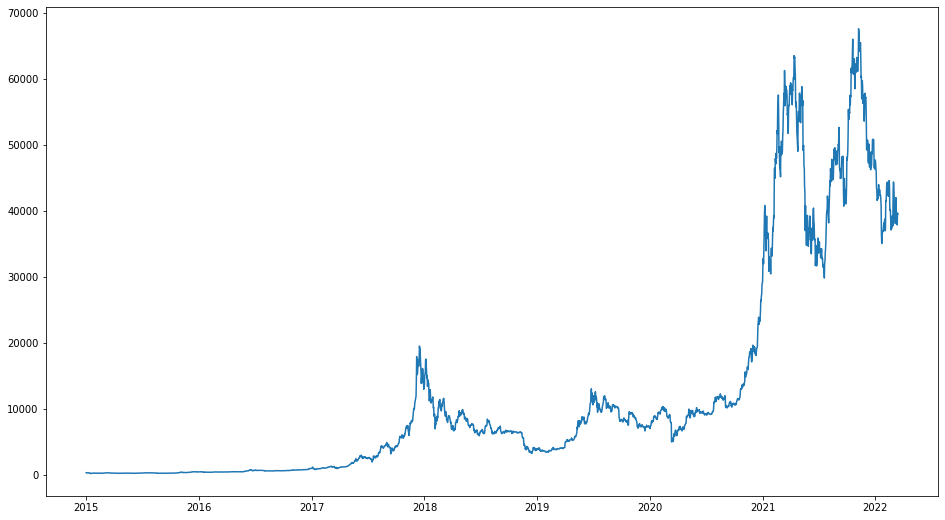

In [18]:
# importar el paquete matplotlib para ver el gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(adj_price)
plt.show()

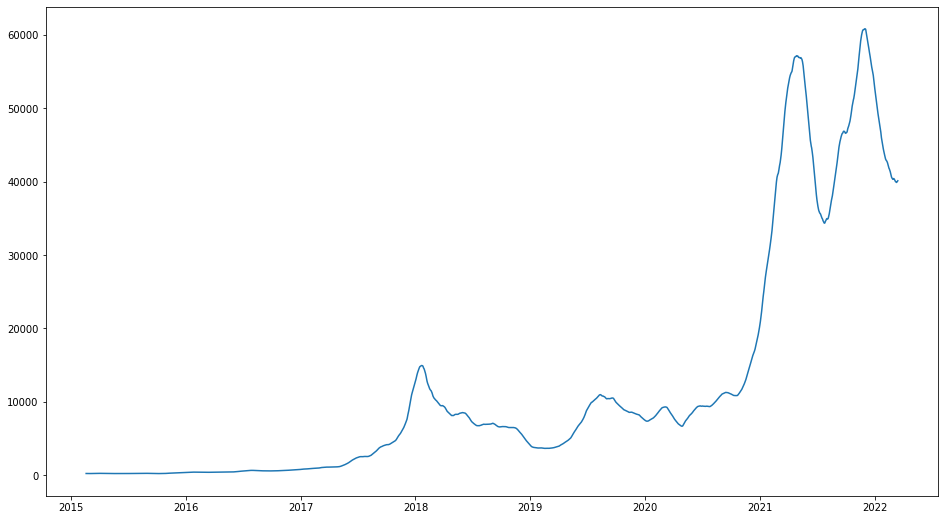

In [19]:
plt.figure(figsize=(16,9))
plt.plot(mav)
plt.show()

Notemos cómo los picos de los datos se suavizan para dar un sentimiento general sobre el rendimiento de la acción.

## Estrategía (Cruce de EMA's)

Esta será una guía paso a paso para desarrollar una estrategia de cruce de medias móviles simples (SMAC) basada en el momento.

Las estrategias basadas en el momento se basan en un indicador técnico que aprovecha la continuidad de la tendencia del mercado. Compramos valores que muestran una tendencia al alza y vendemos en corto  valores que muestran una tendencia a la baja.

La estrategia SMAC es una estrategia de momento  muy conocida. Es una estrategia de largo plazo. El momento, aquí, es el retorno total de las acciones incluyendo los dividendos de los últimos n meses. Este período de n meses se denomina período de retroceso.

Hay 3 tipos principales de períodos de retroceso: a corto plazo, a medio plazo y a largo plazo. Necesitamos definir 2 períodos de retroceso diferentes de una serie de tiempo en particular.

Se genera una señal de compra cuando la media  de retroceso más corta (o media móvil) supera a la media móvil de retroceso más larga. Una señal de venta se produce cuando la media móvil de retroceso más corta cae por debajo de la media móvil más larga.

Paso 1: Inicializar los períodos de retroceso corto y largo

In [20]:
short_lb =50
long_lb = 120

paso2: inicializar un nuevo DataFrame llamado signal_df con una columna de señales


In [21]:
signal_df = pd.DataFrame(index=msft_data.index)
signal_df['signal'] = 0.0

paso3: crear una media móvil simple y corta durante el periodo de observación corto

In [22]:
signal_df['short_mav'] = msft_data['Adj Close'].rolling(window=short_lb, min_periods=1, center=False).mean()

paso4: crear una media móvil simple y larga durante el largo periodo de observación

In [23]:
signal_df['long_mav'] = msft_data['Adj Close'].rolling(window=long_lb, min_periods=1, center=False).mean()

paso5: generar las señales basadas en la sentencia condicional

In [24]:
signal_df['signal'][short_lb:] = np.where(signal_df['short_mav'][short_lb:] > signal_df['long_mav'][short_lb:], 1, 0) 

paso6: crear las órdenes de negociación basadas en la columna de posiciones

In [35]:
signal_df['positions'] = signal_df['signal'].diff()
print(signal_df)
print(signal_df[signal_df.positions==-1])

            signal     short_mav      long_mav  positions
Date                                                     
2015-01-01     0.0    314.248993    314.248993        NaN
2015-01-02     0.0    314.640503    314.640503        0.0
2015-01-03     0.0    303.454336    303.454336        0.0
2015-01-04     0.0    293.639503    293.639503        0.0
2015-01-05     0.0    289.806403    289.806403        0.0
...            ...           ...           ...        ...
2022-03-11     0.0  39875.339141  45894.290202        0.0
2022-03-12     0.0  39924.273047  45683.857454        0.0
2022-03-13     0.0  39980.661328  45462.025260        0.0
2022-03-14     0.0  40048.460312  45247.024544        0.0
2022-03-15     0.0  40105.319062  45046.519499        0.0

[2631 rows x 4 columns]
            signal     short_mav      long_mav  positions
Date                                                     
2015-04-30     0.0    246.742561    247.280142       -1.0
2015-09-13     0.0    251.422778    251.486074 

Hemos creado 2 períodos de observación. El período de retroceso corto short_lb es de 50 días, y el período de retroceso más largo para el promedio móvil largo se define como un long_lb de 120 días.

Hemos creado un nuevo DataFrame que está diseñado para capturar las señales. Estas señales se generan siempre que el promedio móvil corto cruza el promedio móvil largo utilizando el np.where. Asigna 1.0 para verdadero y 0.0 si la condición resulta ser falsa.

Las columnas de positions en el DataFrame nos dicen si hay una señal de compra o de venta, o si sigue igual. Básicamente calculamos la diferencia en la columna de señales de la fila anterior usando diff.

### Visualización
Inicializamos una figura del gráfico, añadir los precios de cierre ajustados, las medias móviles cortas y largas al gráfico, y luego trazar las señales de compra y venta utilizando la columna de posiciones en la signal_df anterior:

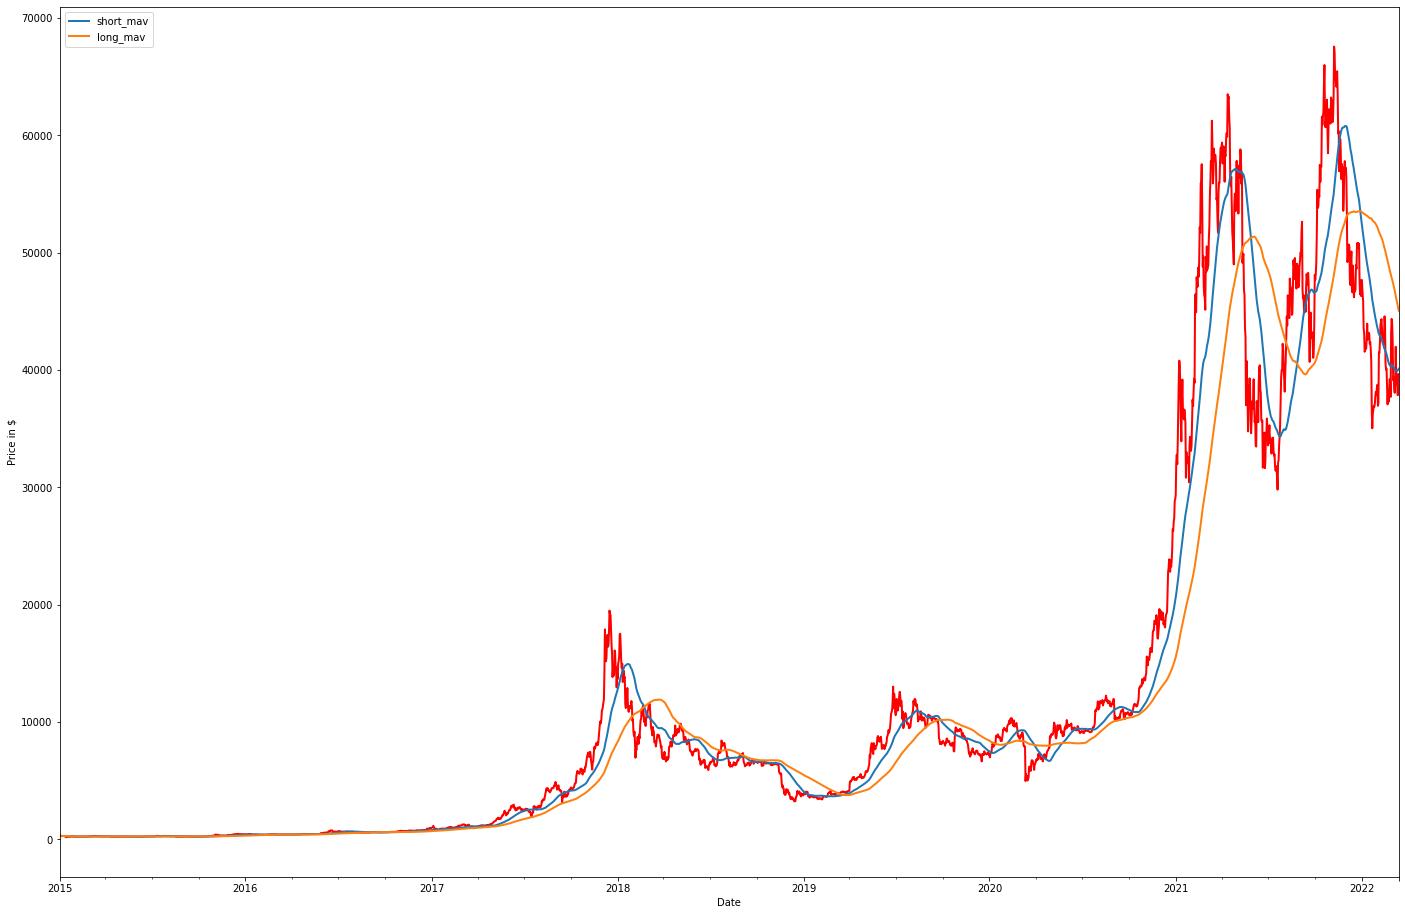

In [36]:

# Initialize the plot figure
fig = plt.figure(figsize=(24,16))


# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
msft_data['Adj Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signal_df[['short_mav', 'long_mav']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signal_df.loc[signal_df.positions == 1.0].index, 
         signal_df.short_mav[signal_df.positions == 1.0],
         '^', markersize=15, color='green')
         
# Plot the sell signals
ax1.plot(signal_df.loc[signal_df.positions == -1.0].index, 
         signal_df.short_mav[signal_df.positions == -1.0],
         'v', markersize=15, color='red')
         
# Show the plot
plt.show()

## BackTesting

Ahora que tiene su estrategia comercial a la mano, es una buena idea probarla y calcular su rendimiento. Pero justo antes de profundizar en esto, es posible que desee saber un poco más sobre las trampas del backtesting, qué componentes se necesitan en un backtester y qué herramientas de Python puede usar para realizar un backtesting de su algoritmo simple.

**Contras:**
* Eventos externos. Estos pueden ser  cambios en el régimen del mercado,cambios regulatorios o eventos macroeconómicos, que definitivamente influyen en su backtesting. Además, las restricciones de liquidez, como la prohibición de las ventas en corto, podrían afectar en gran medida su backtesting.

* Sobreajuste de un modelo (sesgo de optimización), cuando ignora las reglas de la estrategia porque cree que es mejor así (interferencia), o cuando accidentalmente introduce información en datos anteriores ( sesgo de anticipación).

**Componentes**
* Un manejador de datos, que es una interfaz para un conjunto de datos,
* Una estrategia, que genera una señal para ir en largo o en corto en función de los datos,
* Una cartera, que genera órdenes y gestiona pérdidas y ganancias (también conocido como "PnL"), y
* Un controlador de ejecución, que envía la orden al corredor y recibe los "rellenos" o señales de que la acción ha sido comprada o vendida.

Además de estos cuatro componentes, hay muchos más que puedes agregar a tu backtester, dependiendo de la complejidad. Definitivamente puede ir mucho más allá de estos cuatro componentes. Sin embargo, para efectos de la clase solo se concentrará en hacer que estos componentes básicos funcionen en su código.

****

In [42]:
# Set the initial capital
initial_capital= float(1.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signal_df.index).fillna(0.0)

# Buy a 100 shares
positions['BTC'] = 100*signal_df['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(msft_data['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(msft_data['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(msft_data['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.tail())

            BTC  holdings          cash         total  returns
Date                                                          
2022-03-11  0.0       0.0  3.483761e+06  3.483761e+06      0.0
2022-03-12  0.0       0.0  3.483761e+06  3.483761e+06      0.0
2022-03-13  0.0       0.0  3.483761e+06  3.483761e+06      0.0
2022-03-14  0.0       0.0  3.483761e+06  3.483761e+06      0.0
2022-03-15  0.0       0.0  3.483761e+06  3.483761e+06      0.0


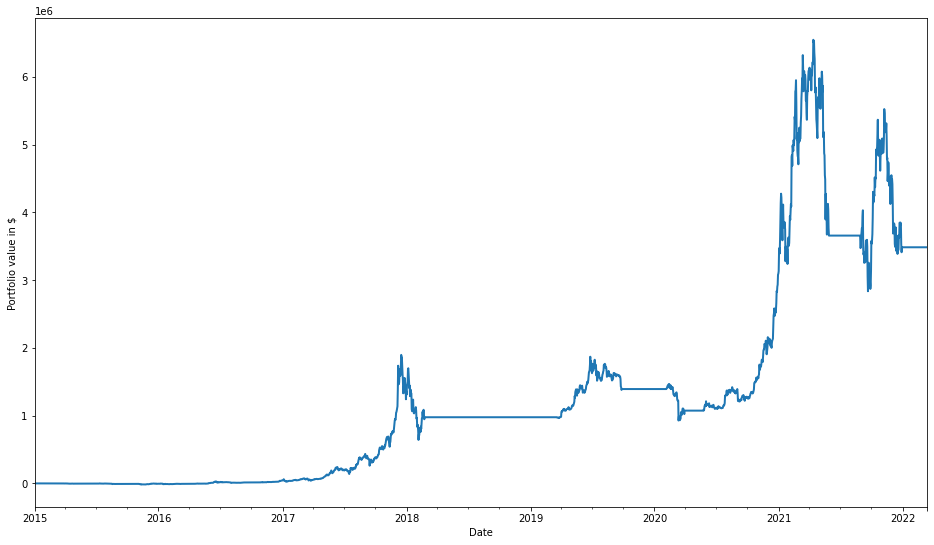

In [45]:
# Create a figure
fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signal_df.positions == 1.0].index, 
         portfolio.total[signal_df.positions == 1.0],
         '^', markersize=0.1, color='m')
ax1.plot(portfolio.loc[signal_df.positions == -1.0].index, 
         portfolio.total[signal_df.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

Es posible que desee mejorar su estrategia. Se pueden usar uno o más algoritmos para mejorar el modelo de forma continua, como KMeans, k-Nearest Neighbors (KNN), árboles de clasificación o regresión y el algoritmo genético.

Otras cosas que puede agregar o hacer de manera diferente es usar un marco de gestión de riesgos o usar pruebas retroactivas basadas en eventos para ayudar a mitigar el sesgo de anticipación.

## Evaluación de estrategía

Puede usar Pandas fácilmente para calcular algunas métricas para juzgar mejor su estrategia comercial simple. En primer lugar, puede utilizar el índice de Sharpe para saber si los rendimientos de su cartera son el resultado del hecho de que decidió realizar inversiones inteligentes o asumir muchos riesgos.x

La situación ideal es, por supuesto, que los rendimientos sean considerables pero que el riesgo adicional de invertir sea el menor posible. Por eso, cuanto mayor sea el ratio de Sharpe de la cartera, mejor: la relación entre la rentabilidad y el riesgo adicional en el que se incurre está bastante bien. Por lo general, los inversores aceptan una relación superior a 1, 2 es muy buena y 3 es excelente.

In [ ]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.4905923462455356


Tenga en cuenta que la tasa libre de riesgo que se excluye en la definición del índice de Sharpe para este tutorial y que el índice de Sharpe generalmente no se considera independiente: generalmente se compara con otras acciones. La mejor manera de abordar este problema es ampliar su estrategia comercial original con más datos (de otras compañías).

A continuación, también puede calcular una reducción máxima, que se utiliza para medir la caída individual más grande desde el punto más alto hasta el más bajo en el valor de una cartera, antes de que se alcance un nuevo punto máximo. En otras palabras, la puntuación indica el riesgo de una cartera elegida en función de una determinada estrategia.

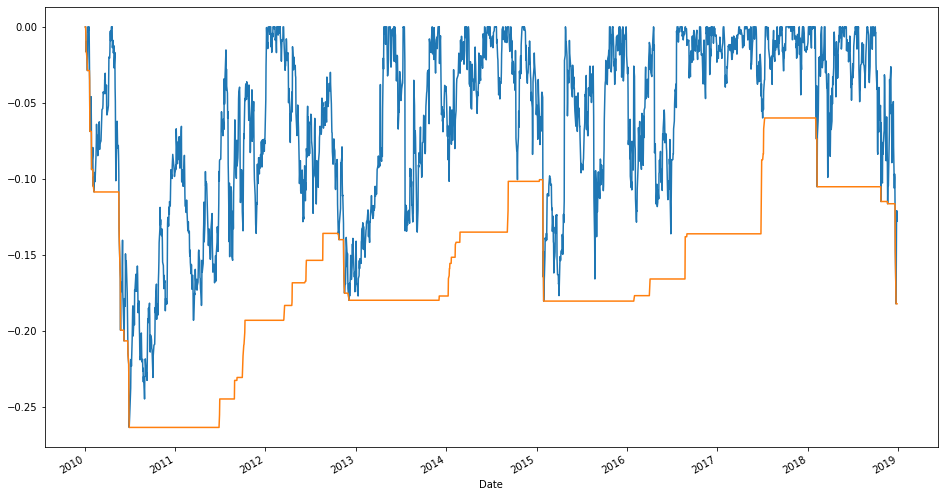

In [ ]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = msft_data['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = msft_data['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
plt.figure(figsize=(16,9))
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

Tenga en cuenta que establece min_periods en 1 porque desea permitir que los datos de los primeros 252 días tengan una ventana de expansión.

El siguiente paso es la tasa de crecimiento anual compuesto (CAGR), que le proporciona una tasa de rendimiento constante durante el período de tiempo. En otras palabras, la tasa le dice lo que realmente tiene al final de su período de inversión. Puede calcular esta tasa dividiendo primero el valor final de la inversión (EV) por el valor inicial de la inversión (BV). Elevas el resultado a la potencia de 1/n, donde n es el número de periodos. ¡Restas 1 del resultado resultante y ahí está tu CAGR!

Tal vez sea más claro así:


$(EV/BV)1/n−1$

Notemos que, se considerarán días, po rlo que 1 es ajustado a 365 días (que es igual a 1 año)


In [ ]:
# Get the number of days in `aapl`
days = (msft_data.index[-1] - msft_data.index[0]).days

# Calculate the CAGR 
cagr = ((((msft_data['Adj Close'][-1]) / msft_data['Adj Close'][1])) ** (365.0/days)) - 1

# Print the CAGR
print(cagr)

0.1687256379806812


## RSI

La fórmula original de Wilder para calcular el RSI se introdujo paso a paso junto con dos ecuaciones principales; el Índice de Fuerza Relativa (RSI) y la Fuerza Relativa (RS). El RS es una medida proporcional de las ganancias de precio promedio y las pérdidas de precio promedio y el RSI proporciona un valor estandarizado de 0 a 100 para reflejar esa relación. La fórmula para cada uno es la siguiente:

$RS = \frac{Avg.Gain}{Avg.Loss}$

$RSI = 100-\frac{100}{1+RS}$

Calcular el RSI primero requiere el RS, que requiere un valor promedio de n-muchos días de negociación anteriores. Un valor de 14 días es común para el cálculo del RSI; es el valor que usó Wilder y también el que usaremos para nuestros ejemplos aquí. El primer valor de RS requiere el precio de los 14 primeros días de negociación. Esta es una fuente común de confusión con el RSI dado que los valores sucesivos solo requieren el más reciente. Veamos el proceso aquí antes de comenzar a desarrollar nuestro código:



1.   Para 14 períodos, calcule la diferencia de precio del período actual y el período anterior;
2.   Para cada período, registre cada cambio positivo en el precio como una ganancia y cada cambio negativo como una pérdida;
3.   En el período 14, calcule la media aritmética de las ganancias y pérdidas durante todo el período de 14 días (por ejemplo, ganancias / 14 y pérdidas / 14);
4.   Utilice estos valores para calcular el RS
5.   Use el valor RS para calcular el RSI
6.   Para cada período anterior, use solo el valor RSI anterior para calcular el siguiente valor promedio multiplicando por nuestro período retrospectivo: 1 (por ejemplo, 13 para una retrospectiva de 14).
7.   Agregue el valor obtenido en el paso 6 al valor del día actual (haga esto tanto para las ganancias como para las pérdidas)

$TSM_{pi}$ = ($WSM_{pi-1}*(\alpha-1)+p)$ / $\alpha$

This equation is used to calculate the average gains and losses after the initial number of periods have values. The variables are explained as such:

* WSMpi – The current average value (for a gain or loss) (a.k.a WSA)
* WSMp (i-1) – The average value from the previous period (a.k.a WSA)
*  $\alpha$ (alpha) – The size of our lookback period
* p – The current period’s measured price difference

In [ ]:
!pip install yfinance
import yfinance as yf

Descarga de datos históricos, en este caso BTCUSDT

In [ ]:
data = yf.Ticker('BTC-USD').history(start='2020-01-01', end='2021-12-31')[['Open', 'High', 'Low', 'Close', 'Volume']]

In [ ]:
data.columns = map(str.lower, data.columns)

print(data)

                    open          high           low         close  \
Date                                                                 
2020-01-01   7194.892090   7254.330566   7174.944336   7200.174316   
2020-01-02   7202.551270   7212.155273   6935.270020   6985.470215   
2020-01-03   6984.428711   7413.715332   6914.996094   7344.884277   
2020-01-04   7345.375488   7427.385742   7309.514160   7410.656738   
2020-01-05   7410.451660   7544.497070   7400.535645   7411.317383   
...                  ...           ...           ...           ...   
2021-12-27  50802.609375  51956.328125  50499.468750  50640.417969   
2021-12-28  50679.859375  50679.859375  47414.210938  47588.855469   
2021-12-29  47623.871094  48119.742188  46201.496094  46444.710938   
2021-12-30  46490.605469  47879.964844  46060.312500  47178.125000   
2021-12-31  47169.371094  48472.527344  45819.953125  46306.445312   

                 volume  
Date                     
2020-01-01  18565664997  
2020-01-02 

Generamos el calculo del RSI

In [ ]:
import pandas as pd
!pip install pandas_ta
import pandas_ta as ta

In [ ]:
def pandas_rsi(df: pd.DataFrame, window_length: int = 14, output: str = None, price: str = 'Close'):
 
    # Calculate Price Differences using the column specified as price.
    df['diff'] = df['close'].diff(1)

    # Calculate Avg. Gains/Losses
    df['gain'] = df['diff'].clip(lower=0).round(2)
    df['loss'] = df['diff'].clip(upper=0).abs().round(2)

    # Get initial Averages
    df['avg_gain'] = df['gain'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
    df['avg_loss'] = df['loss'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]

    # Calculate Average Gains
    for i, row in enumerate(df['avg_gain'].iloc[window_length+1:]):
        df['avg_gain'].iloc[i + window_length + 1] =\
            (df['avg_gain'].iloc[i + window_length] *
             (window_length - 1) +
             df['gain'].iloc[i + window_length + 1])\
            / window_length

    # Calculate Average Losses
    for i, row in enumerate(df['avg_loss'].iloc[window_length+1:]):
        df['avg_loss'].iloc[i + window_length + 1] =\
            (df['avg_loss'].iloc[i + window_length] *
             (window_length - 1) +
             df['loss'].iloc[i + window_length + 1])\
            / window_length

    # Calculate RS Values
    df['rs'] = df['avg_gain'] / df['avg_loss']

    # Calculate RSI
    df['rsi'] = 100 - (100 / (1.0 + df['rs']))

    # Save if specified
    if output is not None:
        df.to_csv(output)

    return df

Aquí vemos 731 filas de datos OHLC con volumen incluido también. Usando la función pandas RSI que creamos anteriormente, podemos generar todos los datos necesarios para nuestra visualización en una sola línea de código:

In [ ]:
pandas_rsi(df=data, window_length=14, price='close')
print(data)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                    open          high           low         close  \
Date                                                                 
2020-01-01   7194.892090   7254.330566   7174.944336   7200.174316   
2020-01-02   7202.551270   7212.155273   6935.270020   6985.470215   
2020-01-03   6984.428711   7413.715332   6914.996094   7344.884277   
2020-01-04   7345.375488   7427.385742   7309.514160   7410.656738   
2020-01-05   7410.451660   7544.497070   7400.535645   7411.317383   
...                  ...           ...           ...           ...   
2021-12-27  50802.609375  51956.328125  50499.468750  50640.417969   
2021-12-28  50679.859375  50679.859375  47414.210938  47588.855469   
2021-12-29  47623.871094  48119.742188  46201.496094  46444.710938   
2021-12-30  46490.605469  47879.964844  46060.312500  47178.125000   
2021-12-31  47169.371094  48472.527344  45819.953125  46306.445312   

                 volume         diff    gain     loss    avg_gain    avg_loss  \
Date    

Aquí vemos que el valor RSI se ha agregado a nuestro objeto DataFrame. De forma predeterminada, los marcos de datos se muestran en el terminal (o en varios flujos de salida estándar) de forma simplificada. Para ver todas las columnas, podemos usar el comando pandas.set_option('display.max_columns', None). Esto mostrará todas las columnas separadas por saltos de línea cuando sea necesario, de modo que todas las columnas estén visibles. Esto se logra a través del siguiente código:

In [ ]:
# Set option to view all columns
pd.set_option('display.max_columns', None)
# View Result
print(data)

                    open          high           low         close  \
Date                                                                 
2020-01-01   7194.892090   7254.330566   7174.944336   7200.174316   
2020-01-02   7202.551270   7212.155273   6935.270020   6985.470215   
2020-01-03   6984.428711   7413.715332   6914.996094   7344.884277   
2020-01-04   7345.375488   7427.385742   7309.514160   7410.656738   
2020-01-05   7410.451660   7544.497070   7400.535645   7411.317383   
...                  ...           ...           ...           ...   
2021-12-27  50802.609375  51956.328125  50499.468750  50640.417969   
2021-12-28  50679.859375  50679.859375  47414.210938  47588.855469   
2021-12-29  47623.871094  48119.742188  46201.496094  46444.710938   
2021-12-30  46490.605469  47879.964844  46060.312500  47178.125000   
2021-12-31  47169.371094  48472.527344  45819.953125  46306.445312   

                 volume         diff    gain     loss    avg_gain    avg_loss  \
Date    

Aquí vemos que todos los pasos intermedios de nuestro cálculo RSI se han agregado a nuestro DataFrame. Esto puede ser útil como una utilidad de depuración en caso de que nuestros valores RSI no aparezcan como se esperaba en nuestra visualización.

### Visualización

Ahora que tenemos nuestros datos cargados y los valores RSI calculados, podemos crear nuestra visualización usando la biblioteca Plotly. Para lograr este objetivo, seguiremos los siguientes pasos:

1. Cree dos subparcelas, una para datos de precios y otra para nuestros datos RSI
2. Cree un gráfico de velas para los datos de precios
3. Cree un gráfico de diagrama de dispersión para los valores RSI
4. Agregar líneas indicadoras para el mínimo/máximo de nuestros valores RSI
5. Agregar líneas indicadoras para los umbrales de sobrecompra/sobreventa
6. Personaliza los colores y el diseño de nuestro gráfico.
7. Vea nuestro gráfico en un navegador web y guarde un archivo de imagen local

Paso 1: Crear dos sublotes
Plotly ofrece a los usuarios un método conveniente para crear múltiples gráficos en visualizaciones individuales. Esta utilidad está disponible a través de la función make_subplots y permite a los desarrolladores especificar el número de filas, columnas e incluso indicar cuándo se deben compartir los ejes (es decir, nuestros valores RSI se representan con los mismos valores de fecha que los precios). Aquí está el código para obtener nuestras subparcelas configuradas:

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create Figure
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_width=[0.25, 0.75])
# Inspect Result
print(fig)

Figure({
    'data': [],
    'layout': {'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'matches': 'x2', 'showticklabels': False},
               'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.3625, 1.0]},
               'yaxis2': {'anchor': 'x2', 'domain': [0.0, 0.2125]}}
})


Aquí vemos un resumen de los parámetros de nuestro nuevo gráfico. No prestaremos mucha atención a esta información más que para confirmar que tenemos 2 conjuntos de ejes que indican que hemos creado con éxito una fila para nuestros datos de precios y nuestros datos RSI.

Paso 2: cree un gráfico de velas japonesas para datos de precios
El RSI se muestra comúnmente como un gráfico adjunto que se muestra debajo de los datos de precios. Esto permite a los operadores visualizar cómo la acción del mercado indicada por el RSI ha influido en la acción del precio a lo largo del tiempo. Para lograr esto, primero debemos configurar un gráfico para nuestros datos de precios. Crearemos un gráfico de velas utilizando nuestros datos OHLC y el siguiente código:

In [ ]:
# Create Candlestick chart for price data
fig.add_trace(go.Candlestick(
    x=data.index,
    open=data['open'],
    high=data['high'],
    low=data['low'],
    close=data['close'],
    increasing_line_color='#ff9900',
    decreasing_line_color='black',
    showlegend=False))

Paso 3: Cree un diagrama de dispersión para el RSI
El siguiente paso es crear un gráfico para nuestro valor RSI. Este será un diagrama de dispersión simple (puntos de datos conectados por una línea) que representan los valores RSI durante las fechas que se muestran en nuestros datos. Aquí especificaremos que el gráfico esté en la parte inferior de nuestra visualización usando el argumento filas=2:

In [ ]:
# Make RSI Plot
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['rsi'],
    line=dict(color='#ff9900', width=2),
    showlegend=False,
), row=2, col=1
)

Paso 4: agregue líneas mínimas/máximas para el RSI
El RSI es un valor estandarizado entre 0-100. Es útil tener este rango reflejado en la visualización RSI para garantizar que aparezca como se espera en los gráficos RSI comunes. Esto asegura que podamos ver un RSI escalado consistentemente incluso cuando inspeccionamos diferentes datos. Esto se logra agregando dos líneas horizontales como se ve en el siguiente código:

In [ ]:
# Add upper/lower bounds
fig.update_yaxes(range=[-10, 110], row=2, col=1)
fig.add_hline(y=0, col=1, row=2, line_color="#666", line_width=2)
fig.add_hline(y=100, col=1, row=2, line_color="#666", line_width=2)

Paso 6: personalizar y visualizar
En este punto, nuestro gráfico está completamente desarrollado y debería reflejar nuestros datos en consecuencia, lo que significa que es hora de crear la visualización. Plotly ofrece varios métodos para mostrar gráficos, incluida la creación de gráficos HTML interactivos, la exportación a imágenes estáticas como .png o .jpg, o la carga directa a su plataforma empresarial Dash para una solución alojada. Usaremos el método show() para iniciar nuestra visualización en el visor HTML predeterminado del sistema (por ejemplo, Chrome, Firefox, Opera, etc.) con el siguiente código:

In [ ]:
# Add overbought/oversold
fig.add_hline(y=30, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
fig.add_hline(y=50, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
fig.add_hline(y=70, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')

Después de ejecutar nuestro código, la siguiente visualización debería iniciarse en el visor HTML predeterminado del sistema. Aquí vemos nuestra figura de velas japonesas en la parte superior con el porcentaje de altura especificado de 0,75 y la subtrama RSI debajo ocupando el resto del espacio de figuras asignado:

In [ ]:
# Customize font, colors, hide range slider
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# update and display
fig.update_layout(layout)
fig.show()

Esta visualización nos brinda amplia información relacionada con el precio y la fluctuación del valor RSI durante nuestro período de tiempo. Uno de los muchos beneficios de las funciones HTML de Plotly son los efectos de pasar el mouse que detallan la información por períodos. En el gráfico de velas japonesas, esto se evidencia en la información de OHLC y el gráfico RSI muestra nuestra fecha y valor RSI.